In [1]:
!pip install dalex
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.7 MB/s 
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=0c9bb09f999f5a1ec7e949bc8eb9a7cd3a8876e90019e1c5d5332d6cf7f47b43
  Stored in directory: /root/.cache/pip/wheels/76/31/8c/c78df586df31b3f3e0c4ecc759ee73e175545cff5548201996
Successfully built dalex
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import dalex as dx

import scikitplot as skplt

%matplotlib inline

LOAD DATA SET

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

DATA INSPECTION

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [5]:
data.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
# adakah data na?
data.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [7]:
# cek adakah dobel customerid (1027 sama dengan jumlah baris data)
data.nunique()


user_id                     10127
attrition_flag                  2
customer_age                   45
gender                          2
dependent_count                 6
education_level                 7
marital_status                  4
income_category                 6
card_category                   4
months_on_book                 44
total_relationship_count        6
months_inactive_12_mon          7
contacts_count_12_mon           7
credit_limit                 6205
total_revolving_bal          1974
avg_open_to_buy              6813
total_amt_chng_q4_q1         1158
total_trans_amt              5033
total_trans_ct                126
total_ct_chng_q4_q1           830
avg_utilization_ratio         964
dtype: int64

**soal 1**

Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?

Apakah terdapat korelasi antara tingkat pendidikan dan income category? 

Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?

Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?

Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn? 


# DATA EXPLORATION

In [8]:
data["attrition_flag"].replace(["Existing Customer","Attrited Customer"],[0,1], inplace=True)
data["gender"].replace(['M','F'],[0,1],inplace=True)
data["education_level"]. replace(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'],[1,3,0,0,2,4,5], inplace=True)
data["marital_status"].replace(['Married', 'Single', 'Unknown', 'Divorced'],[2,1,0,3], inplace=True)
data["income_category"]. replace(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'],[3,1,4,2,5,0], inplace=True)

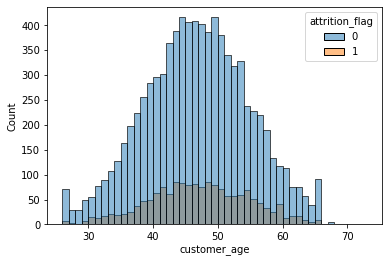

In [9]:
#Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?
sns.histplot(data=data, x="customer_age", hue="attrition_flag")

Jika dilihat dari distribusi usia, customer churn terbanyak berada di rentang usia 43-55 tahun. 

Namun karena jumlah total customer existing juga lebih banyak di usia 43-55 tahun, bukan berrti kemungkinan churnya lebih tinggi karena usia. perlu dibandingkan churn rate di setiap rentang usia. 

In [10]:
data_att = data[data["attrition_flag"]== 1]
data_att_group= data_att.groupby(['customer_age','attrition_flag']).size().reset_index(name='counts_att')
data_att_group.head()

,customer_age,attrition_flag,counts_att
0,26,1,6
1,27,1,3
2,28,1,1
3,29,1,7
4,30,1,15


In [11]:
data_exist = data[data["attrition_flag"]== 0]
data_exist_group= data_exist.groupby(['customer_age','attrition_flag']).size().reset_index(name='counts_exist')
gab = pd.merge(data_exist_group,data_att_group, how="inner", on=["customer_age"])
gab["churn_based_age"] = gab["counts_att"] / (gab["counts_exist"] +gab["counts_att"]) 
gab.sort_values(by="churn_based_age", ascending=False)

,customer_age,attrition_flag_x,counts_exist,attrition_flag_y,counts_att,churn_based_age
41,68,0,1,1,1,0.500000
40,66,0,1,1,1,0.500000
33,59,0,117,1,40,0.254777
28,54,0,238,1,69,0.224756
4,30,0,55,1,15,0.214286
15,41,0,303,1,76,0.200528
29,55,0,228,1,51,0.182796
35,61,0,76,1,17,0.182796
36,62,0,76,1,17,0.182796
22,48,0,387,1,85,0.180085


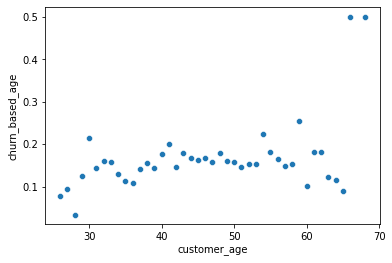

In [12]:
#gab.sort_values(by=["churn_based_age"],ascending=False)
sns.scatterplot( data=gab, x="customer_age", y="churn_based_age")

Dari Chart di atas, peluang churn tertinggi di usia 70 tahun sebesar 50%.  Chur rate 15-20% terbanyak di rentang usia 40-60 tahun. Sedangkan di usia < 30 churn ate cukup rendah di bawah 20%.

In [13]:
#Apakah terdapat korelasi antara tingkat pendidikan dan income category?
data["education_level"].unique()


array([1, 3, 0, 2, 4, 5])

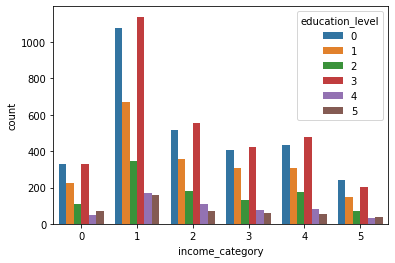

In [14]:
# jika dilihat setiap income distribusi category educationnya hampir sama, pendidikan tidak memiliki korelasi yang tinggi terhadap income

sns.countplot(data=data, x="income_category",hue = "education_level")

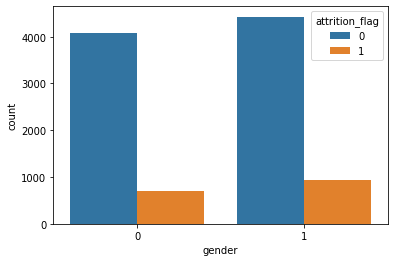

In [15]:
#Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?
sns.countplot(data=data, x="gender", hue="attrition_flag")


jumlah male dan female lebih banyak female, dan nasabah churn lebih banyak juga di female dengan perbedaan yang sangat tipis. ini berrti kedua gender memiliki peluang churn yang hampir sama

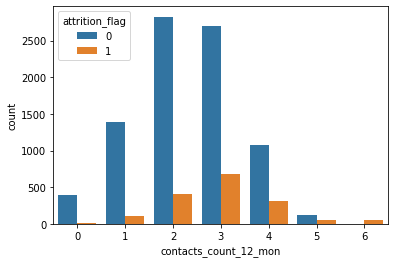

In [16]:
#Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?
sns.countplot(data= data, x="contacts_count_12_mon", hue="attrition_flag")

Jika dilihat dari grafik di atas, interaksi 6 kali kemungkinan churn nya 100%.  Customer yang berinteraksi sebanyak 3 kali memiliki peluang churn paling tinggi dibanding interaksi yang dua kali( karena existing lebih sedikit dibanding 2, namun attritednya lebih banyak. 

dari chart ini bisa dikatakan jumlah interaksi mempengaruhi peluang customer untuk churn.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  int64  
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  int64  
 6   marital_status            10127 non-null  int64  
 7   income_category           10127 non-null  int64  
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

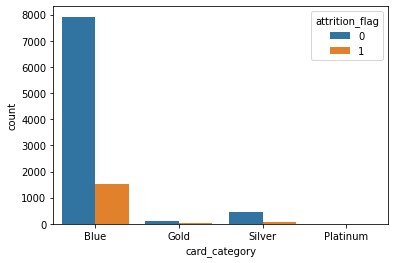

In [18]:
# masih ada satu variabel berbentuk object, yaitu card_category, tapi dari chart di bawah card tidak pengaruh terhada churn, sehingga tidak perlu dimasukkan ke corelasi. cek untuk pengaruh card_category dengan churn 
sns.countplot(data=data, x="card_category", hue="attrition_flag")

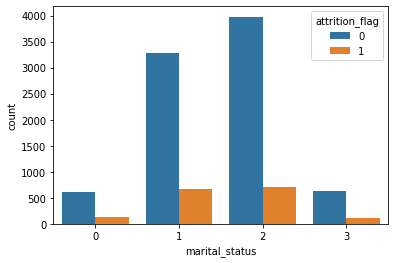

In [19]:
#marital status bukan ordinal jadi kita cek juga pengaruhnya terhadap churn , sehingg kita tahu apakah perlu dijadikan dummy atau tidak
sns.countplot(data=data, x="marital_status", hue="attrition_flag")

secara distribusi sama antara churn dan yang existing, maka kita bisa take out categorical ini dari variabel target

In [20]:
# Remove customerid dari dataset
data = data.drop(["user_id"], axis = 1)

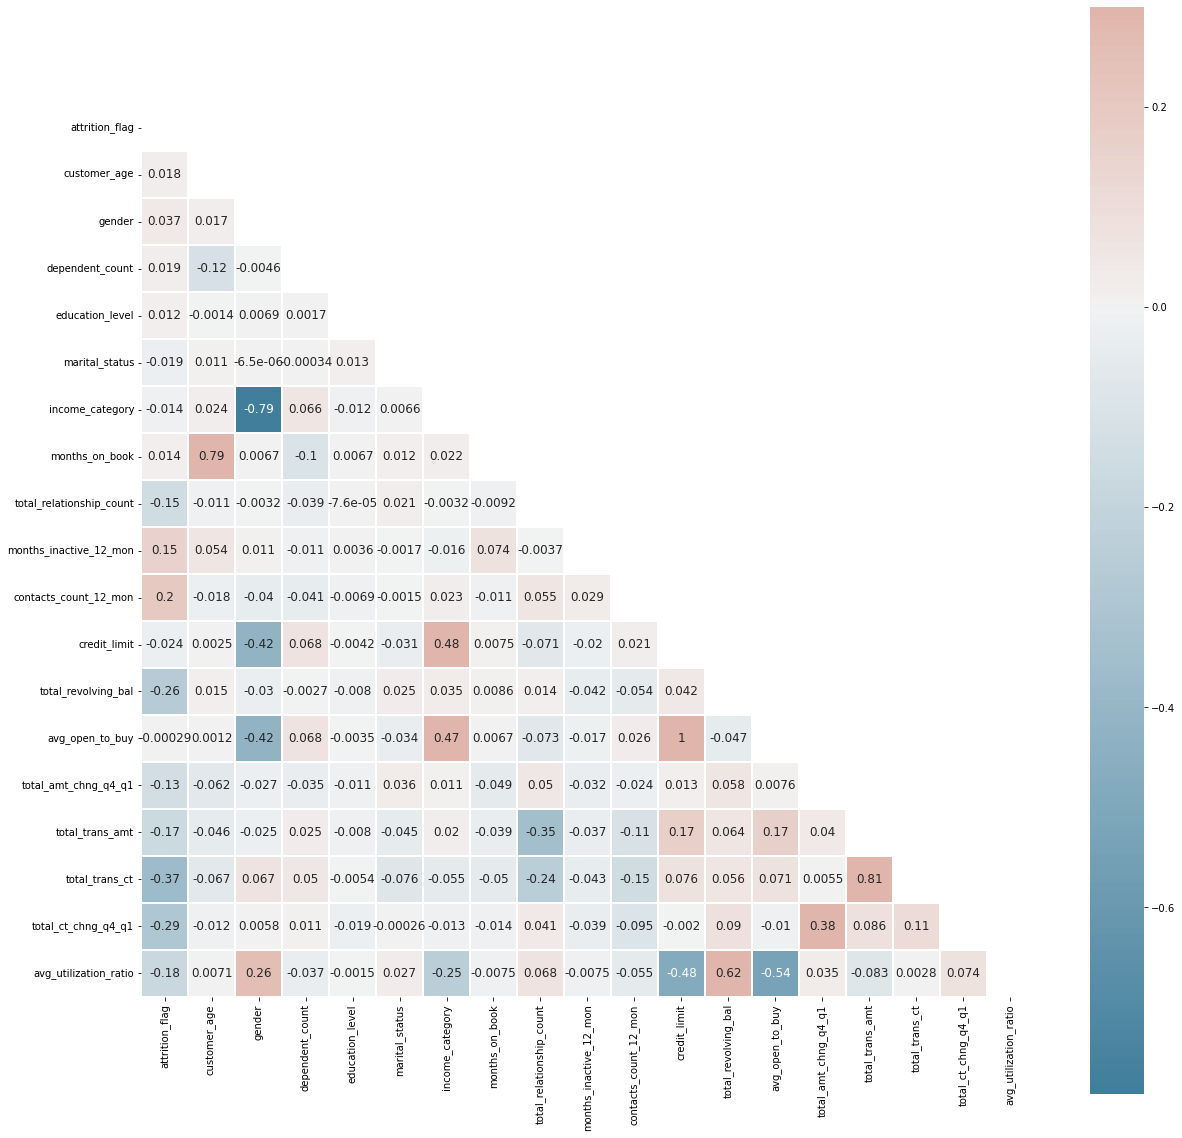

In [21]:
corr = data.corr()
masking = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr, 
    mask=masking, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5,
    annot=True,
    annot_kws={'size':12}
);

Income category punya korelasi kuat terhadap gender,

Month_of_book berkorelasi kuat terhadap customer_age,

avg_open_to_buy korelasi kuat dengan credit limit,

avg_utilization_ratio berkorelasi kuat terhadap total_revolving_bal

total_trans_ct berkorelasi kuat terhadap total_trans_amt

Numerical variabel yang saling berkorelasi kuat ini terhadap attrited juga memiliki korelasi yang rendah .

Maka untuk mengurangi pengaruh confounder kita akan take out variabel2 ini. begitu juga variabel kategorik yang sudah kita cek sebelumnya dan tidak memiliki korelasi terhadap attrited .




**Soal 2 buatlah model prediction untuk model prediction Churn Customer**

In [22]:
data.columns

Index(['attrition_flag', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [23]:
data2 = data.drop(["gender","education_level","marital_status","card_category","months_on_book","customer_age",
                        "avg_open_to_buy","credit_limit","avg_utilization_ratio","total_revolving_bal","total_trans_ct","total_trans_amt"], axis = 1)

In [24]:
X = data2.drop(["attrition_flag"], axis = 1)
y = data2["attrition_flag"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,
    stratify = y, 
    random_state=1000
)

In [26]:
X_train["attrition_flag"] = y_train

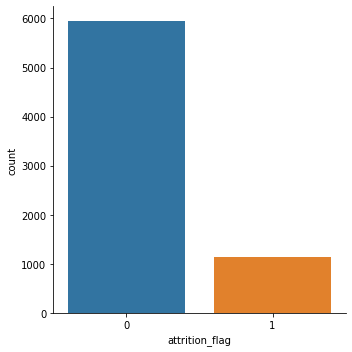

In [27]:
# Cek distribusinya
sns.catplot(x = "attrition_flag", kind = "count", data = X_train);

In [28]:
y_train.value_counts(normalize=True)

0    0.839306
1    0.160694
Name: attrition_flag, dtype: float64

In [29]:
y_train.value_counts(normalize=True)

0    0.839306
1    0.160694
Name: attrition_flag, dtype: float64

**Define Model**

In [30]:
# Hapus kolom target dari X_train
X_train = X_train.drop(["attrition_flag"], axis = 1)

In [31]:
#KNN
knn_clf = KNeighborsClassifier(
    n_neighbors = 5,
    # class_weight = {0: 0.265353, 1:0.734647}
)

In [32]:
# Decision Tree
dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001,
    class_weight = {0: 0.265353, 1:0.734647}
)

In [33]:
# Random Forest

rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.265353, 1:0.734647}
)

In [34]:
# SVM RBF
svm_clf = SVC(
    random_state = 1000,
    probability=True,
    class_weight = {0: 0.265353, 1:0.734647}
)

In [35]:
# XGBoost
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.265353, 1:0.734647}
)

**Fitting Model to Data**

In [36]:
# KNN
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
# Decision Tree
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.265353, 1: 0.734647},
                       max_depth=5)

In [38]:
# Random Forest
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.265353, 1: 0.734647},
                       n_estimators=1000, random_state=1000)

In [39]:
#SVM RBS
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.265353, 1: 0.734647}, probability=True,
    random_state=1000)

In [40]:
# XG Boost
xgb_clf.fit(X_train, y_train)

XGBClassifier(class_weight={0: 0.265353, 1: 0.734647}, n_estimators=1000,
              random_state=1000)

**Model Evaluation**

In [41]:
X_train.shape

(7088, 7)

In [42]:
X_test.shape

(3039, 7)

In [70]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

KNN Evaluation

In [ ]:
# KNN Evaluation
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.864301,0.593939,0.849622,0.729120,0.820886
recall,0.973736,0.200820,0.849622,0.587278,0.849622
f1-score,0.915760,0.300153,0.849622,0.607957,0.816907
support,2551.000000,488.000000,0.849622,3039.000000,3039.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


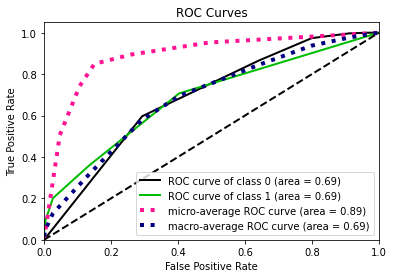

In [ ]:
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

Decision Tree Evaluation

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.909231,0.562222,0.857848,0.735727,0.853509
recall,0.922775,0.518443,0.857848,0.720609,0.857848
f1-score,0.915953,0.539446,0.857848,0.727699,0.855494
support,2551.000000,488.000000,0.857848,3039.000000,3039.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


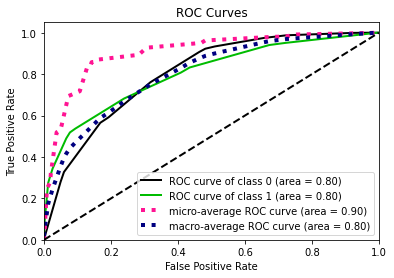

In [ ]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

Random Forest Evaluation

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.893632,0.705455,0.876604,0.799543,0.863415
recall,0.968248,0.397541,0.876604,0.682894,0.876604
f1-score,0.929445,0.508519,0.876604,0.718982,0.861853
support,2551.000000,488.000000,0.876604,3039.000000,3039.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


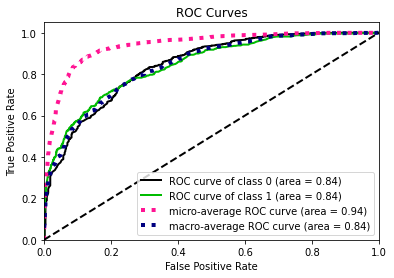

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

SVM RBF

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.895596,0.525926,0.846331,0.710761,0.836235
recall,0.924735,0.436475,0.846331,0.680605,0.846331
f1-score,0.909932,0.477044,0.846331,0.693488,0.840420
support,2551.000000,488.000000,0.846331,3039.000000,3039.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


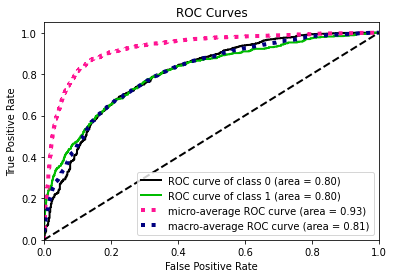

In [ ]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

XGBoost Evaluation

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.902619,0.682927,0.878908,0.792773,0.867341
recall,0.959232,0.459016,0.878908,0.709124,0.878908
f1-score,0.930065,0.549020,0.878908,0.739542,0.868877
support,2551.000000,488.000000,0.878908,3039.000000,3039.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


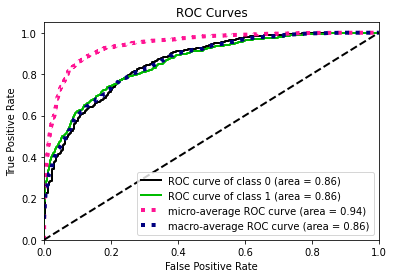

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

**1. Karena data train nya imbalance, maka pilih F-1 Score yang paling tinggi untuk data churn.**

**2. KNN Model F-1 Score nya adalah yang paling kecil dibanding model yang lain, yaitu hanya 30% dimana ROC Curve churn nya juga rendah 0.69**

**3. Decision Tree dan SVN memiliki ROC yang sama yaitu di angka 0.80. Namun F-1 Score dan accuracy pada model Decision tree lebih tinggi dibanding SVM.**

**4. Dibanding 4 model lainnya, XG Boots memiliki nilai F-1 Score paling tinggi sebesar 54% dan acuarcy yang paling tinggi pula 88% dimana ROC nya juga paling tinggi sebesar 86% dengan micro averge dimana mendekati angka 1.**

**Dari ke 5 model ini XG Boost adalah model yang dipilih** 

**Kita analisa data train dengan menggunakan model prediksi XG Boost**

In [92]:
xgb_pred = xgb_clf.predict(X_train)
xgb_pred_proba = xgb_clf.predict_proba(X_train)

In [93]:
y_train

9425    0
6408    0
4922    0
722     0
3135    0
       ..
4062    0
96      0
9436    0
9206    0
9597    1
Name: attrition_flag, Length: 7088, dtype: int64

In [94]:
validation = pd.merge(X_train,y_train , left_index=True , right_index=True)

In [95]:
validation["Predict"]= pd.Series(xgb_pred)

In [96]:
# 2219 data dengan prediksi NaN
validation["Predict"].isnull().sum()

2119

In [97]:
validation

,dependent_count,income_category,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_amt_chng_q4_q1,total_ct_chng_q4_q1,attrition_flag,Predict
9425,4,2,1,3,3,0.785,0.667,0,NaN
6408,4,4,5,1,2,0.804,0.600,0,0.0
4922,4,4,6,1,0,0.596,1.000,0,1.0
722,3,4,6,2,3,0.786,0.520,0,0.0
3135,2,5,6,1,1,0.928,1.107,0,0.0
...,...,...,...,...,...,...,...,...,...
4062,3,3,6,3,2,0.680,0.471,0,0.0
96,3,2,5,4,2,0.597,0.304,0,0.0
9436,3,4,2,1,1,0.787,0.656,0,NaN
9206,4,2,1,2,3,0.967,0.621,0,NaN


In [103]:
validation = validation.dropna(axis=0)


In [104]:
validation

,dependent_count,income_category,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_amt_chng_q4_q1,total_ct_chng_q4_q1,attrition_flag,Predict
6408,4,4,5,1,2,0.804,0.600,0,0.0
4922,4,4,6,1,0,0.596,1.000,0,1.0
722,3,4,6,2,3,0.786,0.520,0,0.0
3135,2,5,6,1,1,0.928,1.107,0,0.0
925,1,3,6,3,3,1.308,0.400,0,0.0
...,...,...,...,...,...,...,...,...,...
2021,2,4,4,2,2,0.952,1.000,0,0.0
1537,1,1,4,2,3,0.728,1.053,0,0.0
5220,2,4,6,2,4,0.863,0.784,0,0.0
4062,3,3,6,3,2,0.680,0.471,0,0.0


In [115]:
cek = validation.groupby(["attrition_flag","Predict"])["Predict"].count()
cek

attrition_flag  Predict
0               0.0        3779
                1.0         470
1               0.0         646
                1.0          74
Name: Predict, dtype: int64

Jika dicoba ke data training, maka dari 4.969 data jumlah yang match = 3.779 + 74 = 3858 atau sebesar 77%